# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

#### Exercise
Analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

<ol>
<li>  Is the distribution of body temperatures normal? 
<li>  Is the sample size large? Are the observations independent?
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> One-sample or two-sample test? Why?
    <li> Use $t$ or $z$ statistic? How is the result different if you use the other test? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"? Compute the margin of error and confidence interval.
<li>  Is there a significant difference between males and females in normal temperature? What test did you use and why?
</ol>

In [311]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

pop_mean = 98.6

df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### Question 1: Is the distribution of body temperatures normal?
The understand if the No, the sample does not have a normal distribution. Instead, the histogram appears to have a biomodal distribution and is skewed, with a few subjects showing body temperatures well above 3 standard deviations above the mean. Subsequent historgrams of body temperature for men and women separately show that the females are driving the temperatures  above the average, while the males samples have the lowest temperatures. Whether this different is statistically signficant will be determined below.

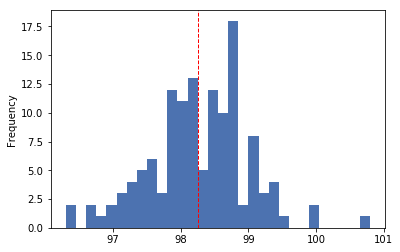

In [237]:
df.temperature.plot.hist(bins=30)

sample_mean = df.temperature.mean()
sample_std = df.temperature.std()
sample_var = df.temperature.var()

#x = np.linspace(mean-3*var, mean+3*var, 100)
#plt.plot(x, mlab.normpdf(x,mean,std))
plt.axvline(x.mean(), color='r', linestyle='dashed', linewidth=1)

Another way to test whether the sample data is normally distributed is:

In [238]:
scipy.stats.mstats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

/Applications/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


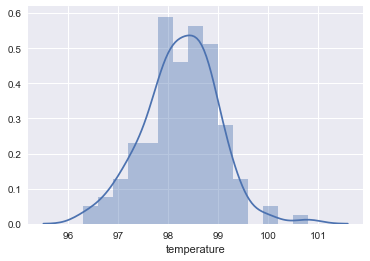

In [312]:
sns.distplot(df.temperature, bins= 15)

### Question 2: Is the sample size large? Observations independent?

With 130 samples, the sample size is sufficiently large. According to the CLT, a sample size of at least 50 observations is sufficiently large.
If we assume that each sample is taken from a unique individual, then we can approximate the samples as independent.

### Question 3: Is the true population mean really 98.6 degrees F?
To test if, based on the single observed sample, the actual population mean is equal to 98.6 degrees F. We must consider the following: 
- Despite the sample size >30, because we do not know the population standard deviation, it is appropriate to use a t-test. 
- We are comparing one sample to a population mean, and should therefore use a one-sample test.  
- We are interested in whether the mean temperature for the observed samples is above or below the population mean. Since we are not concerned about the direction, we will use the two-sided test.

The hypothsis that we're testing is:
- H0: The mean temperature for the population and sample is 98.6 degrees F. 
- Ha: The mean body temperature of the sample is NOT equal to 98.6 F.

In [266]:
print('Sample mean {}' .format(sample_mean))
print('Sample std {}' .format(sample_std))
t = (sample_mean - pop_mean) / (sample_std / np.sqrt(len(df)))

print('t: {}' .format(t))

Sample mean 98.24923076923078
Sample std 0.7331831580389454
t: -5.454823292364079


In [270]:
#double-checking with built-in function
sp.stats.ttest_1samp(df.temperature, pop_mean)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

With a t-score of -5.45 and p-value of 2e-7, the sample is statistically significantly different from the population mean. 

As a comparison: Running a z-test instead shows a z-score of -0.478. Therefore the probability that P(Z < z ) = 0.3156, so the P(-z> Z >z) = 1 - (2 * 0.3156) = 0.3688.

Using the z-test (incorrectly), we could falsely assume that there is no statistically significant different between the sample mean and population mean.

In [279]:
z = (sample_mean - pop_mean) / (sample_std)
print('z: {}' .format(z))

z: -0.4784196512470687


###  Question 4: At what temperature should we consider someone's temperature to be "abnormal"?
We can assume that an "abnormal" temperature is unlikley; I will therefore define a temperature as abnormal if it is outside the significance level (alpha) of 0.01. 

Since we are using a two-tailed hypothesis test, this equates to an upper-tail probability for 0.005. We will therefore use a t of +/- 2.576 to determine the upper and lower bounds of a "normal" temperature. 

In [285]:
#find z-score for 95% confidence
import scipy.stats as stats
t_critical = stats.norm.ppf(q = 0.995)
t_critical

2.5758293035489004

In [286]:
m_error = t_critical * sample_std 
normal = (sample_mean - m_error, sample_mean + m_error)
print('normal range {}' .format(normal))

normal range (96.360676105885531, 100.13778543257602)


Based on the above, a temperature should be considered abnormal if it is below 96.36 or above 100.14 degrees F.

###  Question 5: Is there a significant difference in normal temperature between males and females?

We'll first plot the historgrams for the 2 genders. I have also defined the same bins for each gender, so I could also potentially plot the difference between the 2 histograms.  

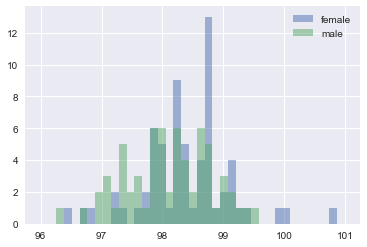

In [287]:
# female subjects
b = np.linspace(96, 101, 40)
females = df.temperature[df.gender == "F"]
fn, fbins, fpatches = plt.hist(females, b, alpha = 0.5, label = 'female')

#male subjects 
males = df.temperature[df.gender == "M"]
mn, mbins, mpatches = plt.hist(males,b,  alpha = 0.5, label = 'male')

plt.legend(loc = 'upper right')

The overlaid histograms show that females tend to skew to higher temperatures, which males tend to skew towards slightly lower temperatures. 

Using a swarmplot (below), we visualize the gender difference differently. We can again see that women tend to have a slightly higher temperature and a broader range of temperatures.

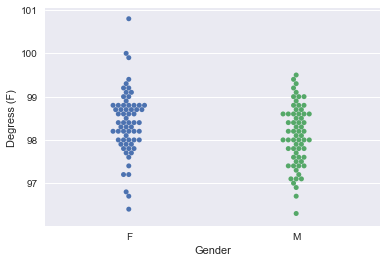

In [315]:
_ = sns.swarmplot(x = 'gender', y = 'temperature', data = df)

_ = plt.xlabel('Gender')
_ = plt.ylabel('Degress (F)')

plt.show()

To understand if there is a statistically significant difference between the two genders: 
- H0: mean_female = mean_males
- H1: mean_femals <> mean_males (or mean_females - mean_males = 0)

To do so, we want to compute a two-sample t-test, which assesses if the mean of two samples is statistically significant.

In [308]:
n_m = len(df[df.gender == 'M'])
mean_males = males.mean()
var_males = males.var() / n_m

n_f = len(df[df.gender == 'F'])
mean_females = females.mean()
var_females = females.var() / n_f

std_diff = np.sqrt(var_females + var_males)
mean_diff = mean_females - mean_males
mean_diff, std_diff
t = mean_diff / std_diff
print('t-test: {}' .format(t))

t-test: 2.285434538165274


In [303]:
#double-checking with built-in methods
f = df.temperature[df.gender == 'F']
m = df.temperature[df.gender == 'M']

sp.stats.ttest_ind(f, m)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

The t-score of 2.28 indicates that there is a statistically signficiant different in body temperature for men and women. Females have a higher mean temperature than the males in this sample set. 